In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import datetime
from scipy.stats import chi2_contingency
import numpy as np

In [57]:
def get_working_dir():
    return Path.cwd()

processed_dir = get_working_dir() / 'data' / 'processed'
os.makedirs(processed_dir, exist_ok=True)

df_t = pd.read_csv(get_working_dir() / 'data' / 'processed' / 't_demographics.csv', encoding='utf-8')
df_m = pd.read_csv(get_working_dir() /  'data' / 'processed' / 'm_demographics.csv', encoding='utf-8')
df_m_t = pd.read_csv(get_working_dir() /  'data' / 'processed' / 'm_t_demographics.csv', encoding='utf-8')

In [58]:
processed_dir = get_working_dir() / 'data' / 'processed'
os.makedirs(processed_dir, exist_ok=True)

# Create plots/demographics directory
results_dir = get_working_dir() / 'plots' / 'demographics'
os.makedirs(results_dir, exist_ok=True)

# Demographic Metrics Bar Plots

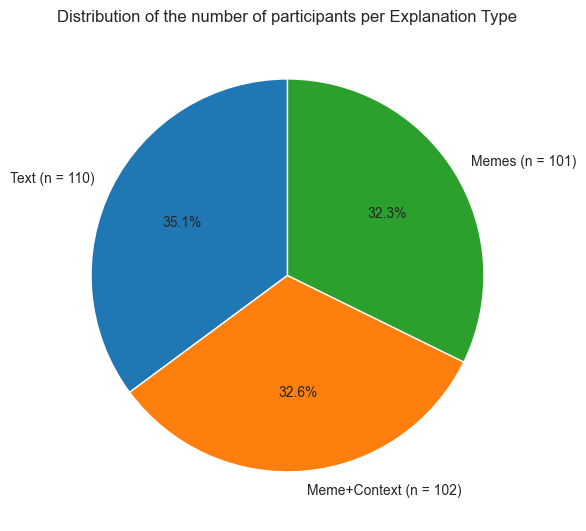

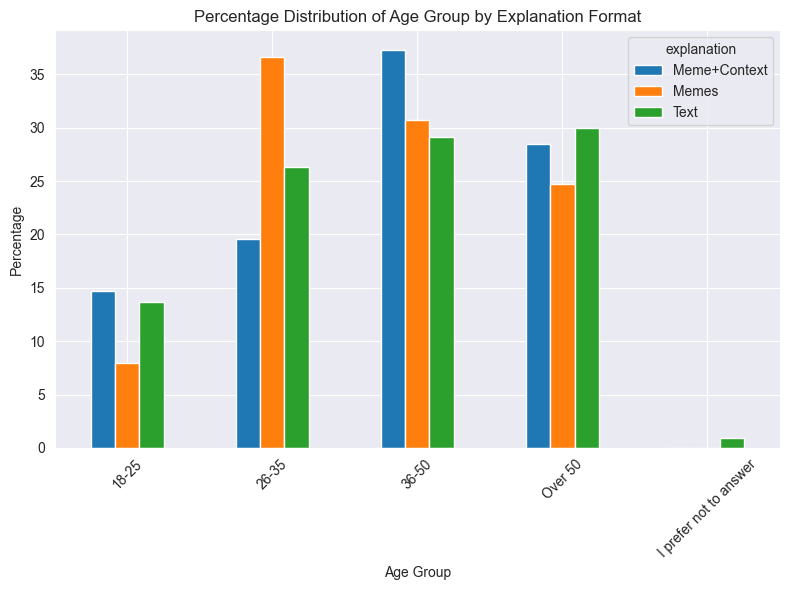

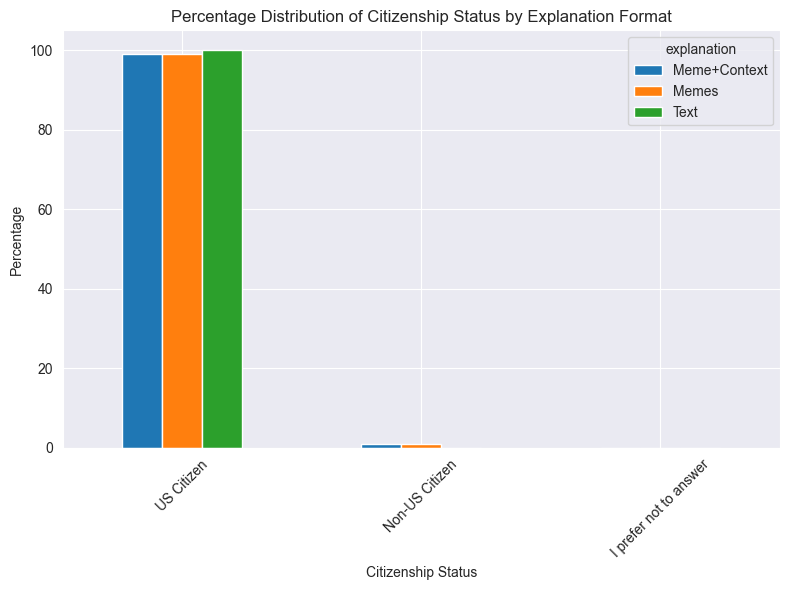

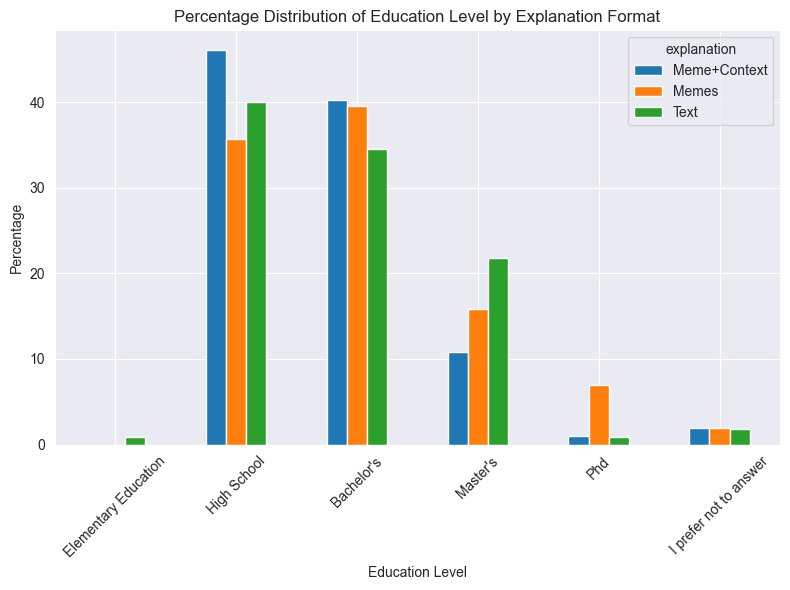

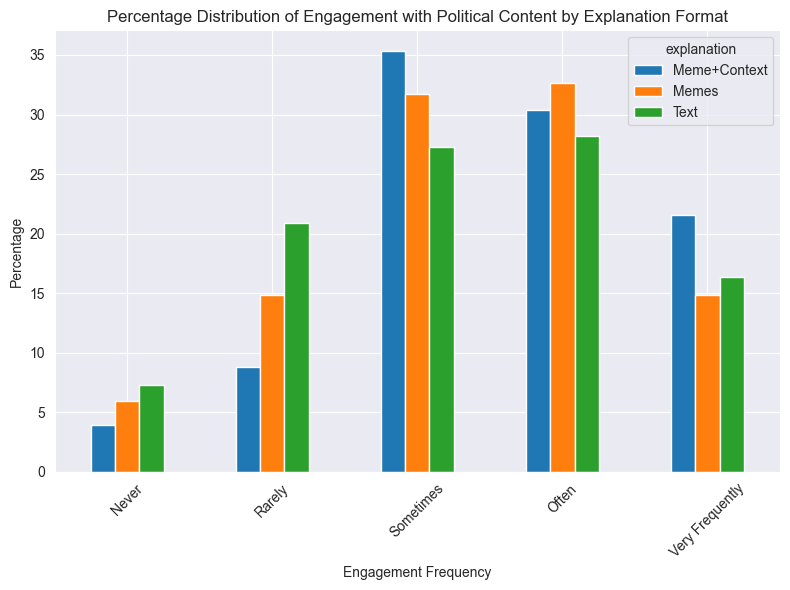

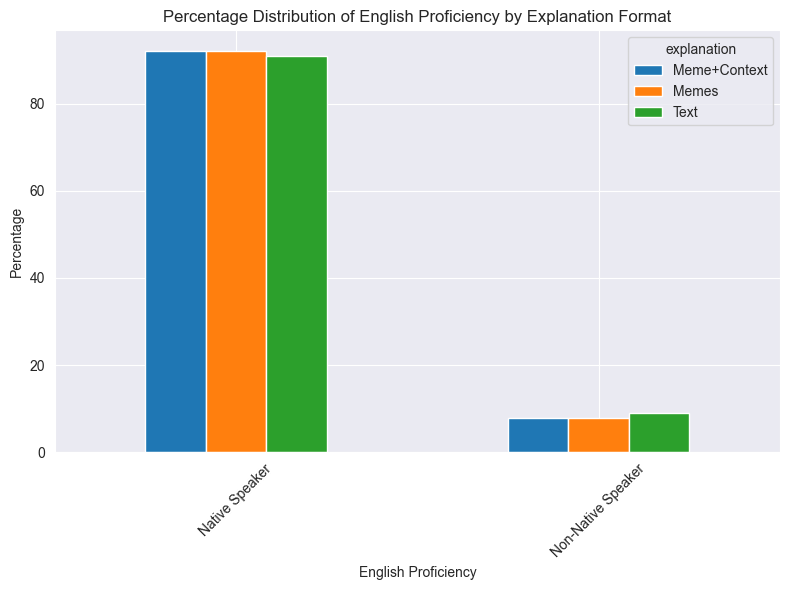

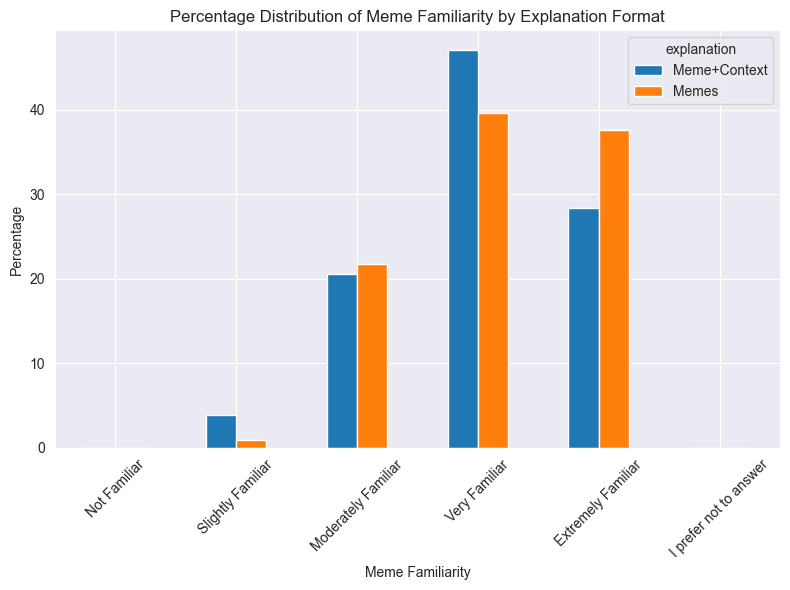

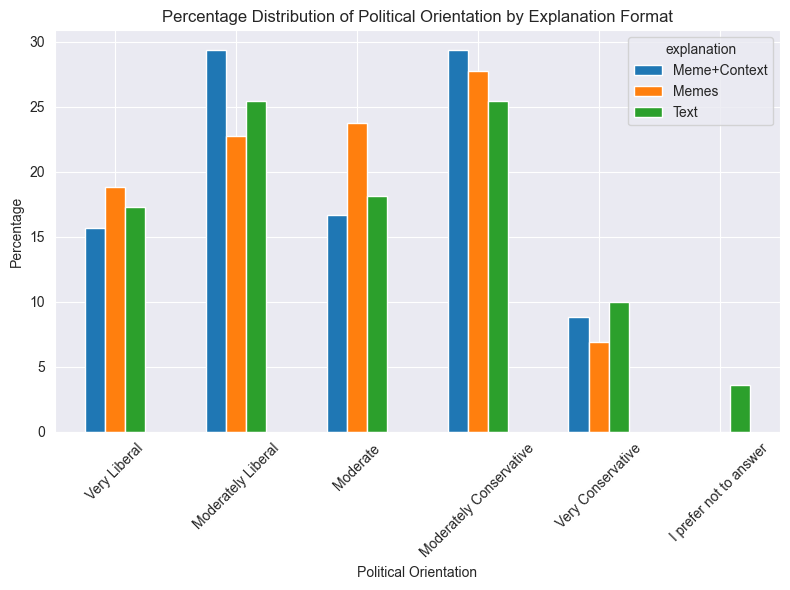

In [59]:
def parse_source(val):
    if pd.isnull(val):
        return val
    return str(val).strip()

def parse_age_group(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "18" in val_lower and "25" in val_lower:
        return "18-25"
    elif "26" in val_lower and "35" in val_lower:
        return "26-35"
    elif "36" in val_lower and "50" in val_lower:
        return "36-50"
    elif "50" in val_lower or "over" in val_lower:
        return "Over 50"
    elif "prefer" in val_lower:
        return "I prefer not to answer"
    else:
        return val

def parse_citizenship_status(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "prefer" in val_lower:
        return "I prefer not to answer"
    if "us citizen" in val_lower and "non-us citizen" not in val_lower:
        return "US Citizen"
    return "Non-US Citizen"

def parse_education_level(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "elementary" in val_lower:
        return "Elementary Education"
    elif "high school" in val_lower:
        return "High School"
    elif "bachelor" in val_lower:
        return "Bachelor's"
    elif "master" in val_lower:
        return "Master's"
    elif "phd" in val_lower or "doctorate" in val_lower:
        return "Phd"
    elif "prefer" in val_lower:
        return "I prefer not to answer"
    else:
        return val

def parse_engagement(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "very frequently" in val_lower or "very often" in val_lower:
        return "Very Frequently"
    elif "often" in val_lower:
        return "Often"
    elif "rarely" in val_lower:
        return "Rarely"
    elif "sometimes" in val_lower:
        return "Sometimes"
    elif "never" in val_lower:
        return "Never"
    else:
        return val

def parse_english_proficiency(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "native" in val_lower:
        return "Native Speaker"
    else:
        return "Non-Native Speaker"

def parse_meme_familiarity(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "not familiar" in val_lower:
        return "Not Familiar"
    elif "slightly" in val_lower:
        return "Slightly Familiar"
    elif "moderately" in val_lower:
        return "Moderately Familiar"
    elif "very familiar" in val_lower:
        return "Very Familiar"
    elif "extremely" in val_lower:
        return "Extremely Familiar"
    elif "prefer" in val_lower:
        return "I prefer not to answer"
    else:
        return val

def parse_political_orientation(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "very liberal" in val_lower:
        return "Very Liberal"
    elif "moderately liberal" in val_lower:
        return "Moderately Liberal"
    elif "moderately conservative" in val_lower:
        return "Moderately Conservative"
    elif "very conservative" in val_lower:
        return "Very Conservative"
    elif "moderate" in val_lower:
        return "Moderate"
    elif "prefer" in val_lower:
        return "I prefer not to answer"
    else:
        return val

# ------------------------------
# Set up working directories and load data

def get_working_dir():
    return Path.cwd()

processed_dir = get_working_dir() / 'data' / 'processed'
os.makedirs(processed_dir, exist_ok=True)

# Load the CSV files (adjust filenames as needed)
df_t   = pd.read_csv(get_working_dir() / 'data' / 'processed' / 't_demographics.csv', encoding='utf-8')
df_m   = pd.read_csv(get_working_dir() / 'data' / 'processed' / 'm_demographics.csv', encoding='utf-8')
df_m_t = pd.read_csv(get_working_dir() / 'data' / 'processed' / 'm_t_demographics.csv', encoding='utf-8')

results_dir = get_working_dir() / 'plots' / 'demographics'
os.makedirs(results_dir, exist_ok=True)

# Create a timestamped subdirectory so each run's plots are saved separately.
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
save_dir = results_dir / timestamp
os.makedirs(save_dir, exist_ok=True)

# ------------------------------
# Combine the DataFrames and tag explanation format

df_t   = df_t.copy()
df_m   = df_m.copy()
df_m_t = df_m_t.copy()

df_t['explanation'] = 'Text'
df_m['explanation'] = 'Memes'
df_m_t['explanation'] = 'Meme+Context'

df_combined = pd.concat([df_t, df_m, df_m_t], sort=False)


def save_and_show(fig, filename):
    fig.tight_layout()
    fig.savefig(save_dir / filename)
    #plt.show()
    #plt.close(fig)

metric_info = {
    'explanation': {
         'col': 'explanation',
         'parse': parse_source,
         'order': None,  # not needed for pie charts
         'plot': 'pie'
    },
    'age_group': {
         'col': 'age_group',
         'parse': parse_age_group,
         'order': ["18-25", "26-35", "36-50", "Over 50", "I prefer not to answer"],
         'plot': 'bar'
    },
    'citizenship_status': {
         'col': 'citizenship_status',
         'parse': parse_citizenship_status,
         'order': ["US Citizen", "Non-US Citizen", "I prefer not to answer"],
         'plot': 'bar'
    },
    'education_level': {
         'col': 'education_level',
         'parse': parse_education_level,
         'order': ["Elementary Education", "High School", "Bachelor's", "Master's", "Phd", "I prefer not to answer"],
         'plot': 'bar'
    },
    'engagement_with_political_content': {
         'col': 'engagement_with_political_content',
         'parse': parse_engagement,
         'order': ["Never", "Rarely", "Sometimes", "Often", "Very Frequently"],
         'plot': 'bar'
    },
    'english_proficiency': {
         'col': 'english_proficiency',
         'parse': parse_english_proficiency,
         'order': ["Native Speaker", "Non-Native Speaker"],
         'plot': 'bar'
    },
    'meme_culture_familiarity': {
         'col': 'meme_culture_familiarity',
         'parse': parse_meme_familiarity,
         'order': ["Not Familiar", "Slightly Familiar", "Moderately Familiar", "Very Familiar", "Extremely Familiar", "I prefer not to answer"],
         'plot': 'bar'
    },
    'political_orientation': {
         'col': 'political_orientation',
         'parse': parse_political_orientation,
         'order': ["Very Liberal", "Moderately Liberal", "Moderate", "Moderately Conservative", "Very Conservative", "I prefer not to answer"],
         'plot': 'bar'
    }
}

# ------------------------------
# Generate visualizations for each metric.
# If the specified column is not found in the data, that metric is skipped.

for metric, info in metric_info.items():
    actual_col = info.get('col', metric)
    if actual_col not in df_combined.columns:
        print(f"Column '{actual_col}' not found in data; skipping metric '{metric}'")
        continue
    
    # For meme_familiarity, use only the explanation groups that have data.
    if metric == 'meme_culture_familiarity':
        df_temp = df_combined[df_combined['explanation'].isin(['Memes', 'Meme+Context'])].copy()
    else:
        df_temp = df_combined.copy()
    
    # Apply the parsing function to the actual column.
    df_temp[actual_col] = df_temp[actual_col].apply(info['parse'])
    
    if info['plot'] == 'pie':
        # Create a single pie chart that aggregates across all explanation types.
        count_series = df_temp[actual_col].value_counts()
        if count_series.empty:
            print(f"No data for metric '{metric}'; skipping pie chart.")
            continue
        # Build labels that include the count.
        labels_with_counts = [f"{label} (n = {count})" for label, count in zip(count_series.index, count_series.values)]
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.pie(count_series, labels=labels_with_counts, autopct='%1.1f%%', startangle=90)
        ax.set_title(f"Distribution of the number of participants per {metric.capitalize()} Type")
        save_and_show(fig, f"{metric}_pie.png")
        
    elif info['plot'] == 'bar':
        order = info['order']
        df_temp[actual_col] = pd.Categorical(df_temp[actual_col], categories=order, ordered=True)
        counts = df_temp.groupby(['explanation', actual_col], observed=True).size().reset_index(name='count')
        counts['percentage'] = counts.groupby('explanation')['count'].transform(lambda x: 100 * x / x.sum())
        pivot = counts.pivot(index=actual_col, columns='explanation', values='percentage').fillna(0).reindex(index=order)
        pivot = pivot.astype(float)
        
        fig, ax = plt.subplots(figsize=(8, 6))
        pivot.plot(kind='bar', ax=ax)
        if metric == 'age_group':
            ax.set_title("Percentage Distribution of Age Group by Explanation Format")
            ax.set_xlabel("Age Group")
        elif metric == 'citizenship_status':
            ax.set_title("Percentage Distribution of Citizenship Status by Explanation Format")
            ax.set_xlabel("Citizenship Status")
        elif metric == 'education_level':
            ax.set_title("Percentage Distribution of Education Level by Explanation Format")
            ax.set_xlabel("Education Level")
        elif metric == 'engagement_with_political_content':
            ax.set_title("Percentage Distribution of Engagement with Political Content by Explanation Format")
            ax.set_xlabel("Engagement Frequency")
        elif metric == 'english_proficiency':
            ax.set_title("Percentage Distribution of English Proficiency by Explanation Format")
            ax.set_xlabel("English Proficiency")
        elif metric == 'meme_culture_familiarity':
            ax.set_title("Percentage Distribution of Meme Familiarity by Explanation Format")
            ax.set_xlabel("Meme Familiarity")
            plt.xticks(rotation=45, fontsize=10)
        elif metric == 'political_orientation':
            ax.set_title("Percentage Distribution of Political Orientation by Explanation Format")
            ax.set_xlabel("Political Orientation")
        ax.set_ylabel("Percentage")
        plt.xticks(rotation=45)
        save_and_show(fig, f"{metric}_percentages.png")


# Output text for demographic information

In [1]:
import pandas as pd
import os
from pathlib import Path
import datetime
import numpy as np

# ------------------------------
# Define parsing functions

def parse_source(val):
    if pd.isnull(val):
        return val
    return str(val).strip()

def parse_age_group(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "18" in val_lower and "25" in val_lower:
        return "18-25"
    elif "26" in val_lower and "35" in val_lower:
        return "26-35"
    elif "36" in val_lower and "50" in val_lower:
        return "36-50"
    elif "50" in val_lower or "over" in val_lower:
        return "Over 50"
    elif "prefer" in val_lower:
        return "I prefer not to answer"
    else:
        return val

def parse_citizenship_status(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "prefer" in val_lower:
        return "I prefer not to answer"
    if "us citizen" in val_lower and "non-us citizen" not in val_lower:
        return "US Citizen"
    return "Non-US Citizen"

def parse_education_level(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "elementary" in val_lower:
        return "Elementary Education"
    elif "high school" in val_lower:
        return "High School"
    elif "bachelor" in val_lower:
        return "Bachelor's"
    elif "master" in val_lower:
        return "Master's"
    elif "phd" in val_lower or "doctorate" in val_lower:
        return "Phd"
    elif "prefer" in val_lower:
        return "I prefer not to answer"
    else:
        return val

def parse_engagement(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "very frequently" in val_lower or "very often" in val_lower:
        return "Very Frequently"
    elif "often" in val_lower:
        return "Often"
    elif "rarely" in val_lower:
        return "Rarely"
    elif "sometimes" in val_lower:
        return "Sometimes"
    elif "never" in val_lower:
        return "Never"
    else:
        return val

def parse_english_proficiency(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "native" in val_lower:
        return "Native Speaker"
    else:
        return "Non-Native Speaker"

def parse_meme_familiarity(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "not familiar" in val_lower:
        return "Not Familiar"
    elif "slightly" in val_lower:
        return "Slightly Familiar"
    elif "moderately" in val_lower:
        return "Moderately Familiar"
    elif "very familiar" in val_lower:
        return "Very Familiar"
    elif "extremely" in val_lower:
        return "Extremely Familiar"
    elif "prefer" in val_lower:
        return "I prefer not to answer"
    else:
        return val

def parse_political_orientation(val):
    if pd.isnull(val):
        return val
    val_lower = str(val).lower()
    if "very liberal" in val_lower:
        return "Very Liberal"
    elif "moderately liberal" in val_lower:
        return "Moderately Liberal"
    elif "moderately conservative" in val_lower:
        return "Moderately Conservative"
    elif "very conservative" in val_lower:
        return "Very Conservative"
    elif "moderate" in val_lower:
        return "Moderate"
    elif "prefer" in val_lower:
        return "I prefer not to answer"
    else:
        return val

# ------------------------------
# Set up working directories and load data

def get_working_dir():
    return Path.cwd()

processed_dir = get_working_dir() / 'data' / 'processed'
os.makedirs(processed_dir, exist_ok=True)

# Load the CSV files (adjust filenames as needed)
df_t   = pd.read_csv(get_working_dir() / 'data' / 'processed' / 't_demographics.csv', encoding='utf-8')
df_m   = pd.read_csv(get_working_dir() / 'data' / 'processed' / 'm_demographics.csv', encoding='utf-8')
df_m_t = pd.read_csv(get_working_dir() / 'data' / 'processed' / 'm_t_demographics.csv', encoding='utf-8')

# ------------------------------
# Tag explanation types and combine the DataFrames

df_t   = df_t.copy()
df_m   = df_m.copy()
df_m_t = df_m_t.copy()

df_t['explanation'] = 'Text'
df_m['explanation'] = 'Memes'
df_m_t['explanation'] = 'Meme+Context'

df_combined = pd.concat([df_t, df_m, df_m_t], sort=False)

# ------------------------------
# Define metrics and associated metadata for processing

metric_info = {
    'explanation': {
         'col': 'explanation',
         'parse': parse_source,
         'order': None,  # order is not needed for text summary of pie charts
         'plot': 'pie'
    },
    'age_group': {
         'col': 'age_group',
         'parse': parse_age_group,
         'order': ["18-25", "26-35", "36-50", "Over 50", "I prefer not to answer"],
         'plot': 'bar'
    },
    'citizenship_status': {
         'col': 'citizenship_status',
         'parse': parse_citizenship_status,
         'order': ["US Citizen", "Non-US Citizen", "I prefer not to answer"],
         'plot': 'bar'
    },
    'education_level': {
         'col': 'education_level',
         'parse': parse_education_level,
         'order': ["Elementary Education", "High School", "Bachelor's", "Master's", "Phd", "I prefer not to answer"],
         'plot': 'bar'
    },
    'engagement_with_political_content': {
         'col': 'engagement_with_political_content',
         'parse': parse_engagement,
         'order': ["Never", "Rarely", "Sometimes", "Often", "Very Frequently"],
         'plot': 'bar'
    },
    'english_proficiency': {
         'col': 'english_proficiency',
         'parse': parse_english_proficiency,
         'order': ["Native Speaker", "Non-Native Speaker"],
         'plot': 'bar'
    },
    'meme_culture_familiarity': {
         'col': 'meme_culture_familiarity',
         'parse': parse_meme_familiarity,
         'order': ["Not Familiar", "Slightly Familiar", "Moderately Familiar", "Very Familiar", "Extremely Familiar", "I prefer not to answer"],
         'plot': 'bar'
    },
    'political_orientation': {
         'col': 'political_orientation',
         'parse': parse_political_orientation,
         'order': ["Very Liberal", "Moderately Liberal", "Moderate", "Moderately Conservative", "Very Conservative", "I prefer not to answer"],
         'plot': 'bar'
    }
}

# ------------------------------
# Generate text summaries for each metric

print("\n=== Demographic Information Summary ===\n")

for metric, info in metric_info.items():
    actual_col = info.get('col', metric)
    if actual_col not in df_combined.columns:
        print(f"Column '{actual_col}' not found in data; skipping metric '{metric}'\n")
        continue
    
    # For meme_culture_familiarity, filter to only the relevant explanation groups.
    if metric == 'meme_culture_familiarity':
        df_temp = df_combined[df_combined['explanation'].isin(['Memes', 'Meme+Context'])].copy()
    else:
        df_temp = df_combined.copy()
    
    # Apply the parsing function to the column.
    df_temp[actual_col] = df_temp[actual_col].apply(info['parse'])
    
    if info['plot'] == 'pie':
        # Aggregate counts across all data (ignoring explanation splits)
        count_series = df_temp[actual_col].value_counts()
        if count_series.empty:
            print(f"No data for metric '{metric}'; skipping.\n")
            continue
        total_count = count_series.sum()
        print(f"Distribution of participants for '{metric.capitalize()}':")
        for label, count in count_series.items():
            percentage = 100 * count / total_count
            print(f"  {label}: {count} participants ({percentage:.1f}%)")
        print()  # extra newline for spacing
        
    elif info['plot'] == 'bar':
        # Calculate groupwise percentages by explanation type.
        order = info['order']
        df_temp[actual_col] = pd.Categorical(df_temp[actual_col], categories=order, ordered=True)
        counts = df_temp.groupby(['explanation', actual_col], observed=True).size().reset_index(name='count')
        # Compute percentages within each explanation group
        counts['percentage'] = counts.groupby('explanation')['count'].transform(lambda x: 100 * x / x.sum())
        
        # Pivot the table so that rows = demographic category levels, columns = explanation types.
        pivot = counts.pivot(index=actual_col, columns='explanation', values='percentage').fillna(0)
        pivot = pivot.reindex(index=order)
        pivot = pivot.astype(float)
        
        # Create an appropriate title based on the metric.
        if metric == 'age_group':
            title = "Percentage Distribution of Age Group by Explanation Format:"
        elif metric == 'citizenship_status':
            title = "Percentage Distribution of Citizenship Status by Explanation Format:"
        elif metric == 'education_level':
            title = "Percentage Distribution of Education Level by Explanation Format:"
        elif metric == 'engagement_with_political_content':
            title = "Percentage Distribution of Engagement with Political Content by Explanation Format:"
        elif metric == 'english_proficiency':
            title = "Percentage Distribution of English Proficiency by Explanation Format:"
        elif metric == 'meme_culture_familiarity':
            title = "Percentage Distribution of Meme Familiarity by Explanation Format:"
        elif metric == 'political_orientation':
            title = "Percentage Distribution of Political Orientation by Explanation Format:"
        else:
            title = f"Percentage Distribution of {metric.replace('_', ' ').capitalize()} by Explanation Format:"
        
        print(title)
        # Print the pivot table as text.
        print(pivot.to_string())
        print()  # extra newline for spacing



=== Demographic Information Summary ===

Distribution of participants for 'Explanation':
  Text: 110 participants (35.1%)
  Meme+Context: 102 participants (32.6%)
  Memes: 101 participants (32.3%)

Percentage Distribution of Age Group by Explanation Format:
explanation             Meme+Context      Memes       Text
age_group                                                 
18-25                      14.705882   7.920792  13.636364
26-35                      19.607843  36.633663  26.363636
36-50                      37.254902  30.693069  29.090909
Over 50                    28.431373  24.752475  30.000000
I prefer not to answer      0.000000   0.000000   0.909091

Percentage Distribution of Citizenship Status by Explanation Format:
explanation             Meme+Context      Memes   Text
citizenship_status                                    
US Citizen                 99.019608  99.009901  100.0
Non-US Citizen              0.980392   0.990099    0.0
I prefer not to answer           NaN  

# Correlation Analysis for the Demographic Metrics

Cramér's V Correlation Matrix:
                                   age_group  citizenship_status  \
age_group                           1.000000            0.101081   
citizenship_status                  0.101081            1.000000   
education_level                     0.119817            0.088632   
engagement_with_political_content   0.118501            0.095700   
english_proficiency                 0.114658            0.338896   
meme_culture_familiarity            0.140673            0.138577   
political_orientation               0.097751            0.085531   

                                   education_level  \
age_group                                 0.119817   
citizenship_status                        0.088632   
education_level                           1.000000   
engagement_with_political_content         0.118056   
english_proficiency                       0.086070   
meme_culture_familiarity                  0.098720   
political_orientation                     0.15

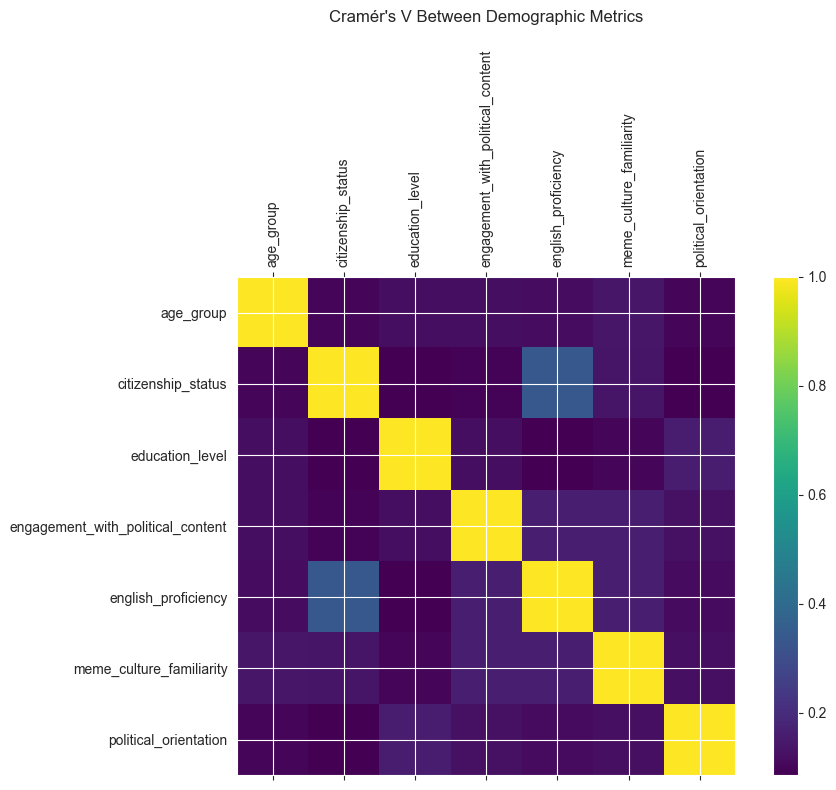


Statistically significant associations (p < 0.05):
citizenship_status vs english_proficiency: Cramér's V = 0.339, p = 2.06e-12
education_level vs political_orientation: Cramér's V = 0.157, p = 0.0191
engagement_with_political_content vs english_proficiency: Cramér's V = 0.161, p = 0.0403

L1 Imbalance (Average pairwise total variation) per metric:
age_group: L1 = 0.127
citizenship_status: L1 = 0.042
education_level: L1 = 0.114
engagement_with_political_content: L1 = 0.116
english_proficiency: L1 = 0.017
meme_culture_familiarity: L1 = 0.368
political_orientation: L1 = 0.092

Overall average L1 imbalance across metrics: 0.125


In [60]:
from itertools import combinations

# ------------------------------
# Function to compute Cramér's V and its p-value between two categorical variables.
def cramers_v_stats(x, y):
    # Drop missing and "I prefer not to answer" responses
    valid = (x.notnull()) & (y.notnull()) & (x != "I prefer not to answer") & (y != "I prefer not to answer")
    x_valid = x[valid].reset_index(drop=True)
    y_valid = y[valid].reset_index(drop=True)
    
    if len(x_valid) == 0 or len(y_valid) == 0:
        return np.nan, np.nan
    
    contingency_table = pd.crosstab(x_valid, y_valid)
    if contingency_table.size == 0:
        return np.nan, np.nan
    
    chi2, p, dof, expected = chi2_contingency(contingency_table, correction=False)
    n = contingency_table.to_numpy().sum()
    min_dim = min(contingency_table.shape) - 1
    if n == 0 or min_dim == 0:
        return np.nan, p
    V = np.sqrt(chi2 / (n * min_dim))
    return V, p

# ------------------------------
# Function to compute the pairwise L1 (total variation) imbalance for one metric across explanation groups.
def compute_l1_for_metric(df, metric, group_col='explanation'):
    groups = df[group_col].dropna().unique()
    groups = sorted(groups)
    # Determine the full set of categories for this metric.
    domain = sorted(df[metric].dropna().unique())
    rel_freq = {}
    for g in groups:
        subset = df[df[group_col] == g][metric]
        # Compute relative frequencies (proportions) and reindex to include all categories.
        freq = subset.value_counts(normalize=True)
        freq = freq.reindex(domain, fill_value=0)
        rel_freq[g] = freq
    dists = []
    for g1, g2 in combinations(groups, 2):
        # Total variation distance = 0.5 * sum(|p - q|)
        d = np.sum(np.abs(rel_freq[g1] - rel_freq[g2])) / 2
        dists.append(d)
    if dists:
        return np.mean(dists)
    else:
        return np.nan

# ------------------------------
# Set up working directories and load data.
def get_working_dir():
    return Path.cwd()

# Adjust these file paths if necessary.
df_t   = pd.read_csv(get_working_dir() / 'data' / 'processed' / 't_demographics.csv', encoding='utf-8')
df_m   = pd.read_csv(get_working_dir() / 'data' / 'processed' / 'm_demographics.csv', encoding='utf-8')
df_m_t = pd.read_csv(get_working_dir() / 'data' / 'processed' / 'm_t_demographics.csv', encoding='utf-8')

# Tag each dataset with its explanation format.
df_t['explanation'] = 'Text'
df_m['explanation'] = 'Memes'
df_m_t['explanation'] = 'Meme+Context'
df_combined = pd.concat([df_t, df_m, df_m_t], sort=False)

# ------------------------------
# Create a timestamped subdirectory for saving plots.
results_dir = get_working_dir() / 'plots' / 'demographics'
results_dir.mkdir(parents=True, exist_ok=True)
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
save_dir = results_dir / timestamp
save_dir.mkdir(parents=True, exist_ok=True)

# ------------------------------
# List of demographic variables to analyze.
# (Update these names as needed to match your data.)
demographic_vars = [
    'age_group', 
    'citizenship_status', 
    'education_level', 
    'engagement_with_political_content', 
    'english_proficiency', 
    'meme_culture_familiarity',  # if your actual column name differs, update here.
    'political_orientation'
]

# ------------------------------
# Compute the correlation matrix and a corresponding p-value matrix.
corr_matrix = pd.DataFrame(index=demographic_vars, columns=demographic_vars, dtype=float)
p_matrix = pd.DataFrame(index=demographic_vars, columns=demographic_vars, dtype=float)

for var1 in demographic_vars:
    for var2 in demographic_vars:
        V, p = cramers_v_stats(df_combined[var1], df_combined[var2])
        corr_matrix.loc[var1, var2] = V
        p_matrix.loc[var1, var2] = p

print("Cramér's V Correlation Matrix:")
print(corr_matrix)
print("\nP-value Matrix:")
print(p_matrix)

# ------------------------------
# Plot the correlation matrix as a heatmap and save it.
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix.astype(float), cmap='viridis')
fig.colorbar(cax)

ax.set_xticks(np.arange(len(demographic_vars)))
ax.set_yticks(np.arange(len(demographic_vars)))
ax.set_xticklabels(demographic_vars, rotation=90)
ax.set_yticklabels(demographic_vars)
ax.set_title("Cramér's V Between Demographic Metrics", pad=20)

plt.tight_layout()
fig.savefig(save_dir / "correlation_heatmap.png")
plt.show()

# ------------------------------
# Analyze pairwise associations and print those with p < 0.05.
print("\nStatistically significant associations (p < 0.05):")
alpha = 0.05
for i in range(len(demographic_vars)):
    for j in range(i+1, len(demographic_vars)):
        var1 = demographic_vars[i]
        var2 = demographic_vars[j]
        p = p_matrix.loc[var1, var2]
        V = corr_matrix.loc[var1, var2]
        if pd.notnull(p) and p < alpha:
            print(f"{var1} vs {var2}: Cramér's V = {V:.3f}, p = {p:.3g}")

# ------------------------------
# Compute and print L1 imbalance (total variation distance) for each metric among the three samples.
print("\nL1 Imbalance (Average pairwise total variation) per metric:")
l1_values = {}
for metric in demographic_vars:
    l1 = compute_l1_for_metric(df_combined, metric, group_col='explanation')
    l1_values[metric] = l1
    print(f"{metric}: L1 = {l1:.3f}")

# Optionally, compute an overall average L1 imbalance across metrics.
overall_l1 = np.nanmean(list(l1_values.values()))
print(f"\nOverall average L1 imbalance across metrics: {overall_l1:.3f}")

# Refactor code above

In [4]:
from itertools import combinations
import pandas as pd
import numpy as np
from pathlib import Path
import datetime
from scipy.stats import chi2_contingency, spearmanr

# ----------------------------------------
# FUNCTIONS
# ----------------------------------------

def cramers_v_stats(x, y):
    """
    Compute Cramér's V statistic and p-value between two categorical variables.
    Drops missing values and responses of "I prefer not to answer".
    """
    valid = (x.notnull()) & (y.notnull()) & (x != "I prefer not to answer") & (y != "I prefer not to answer")
    x_valid = x[valid].reset_index(drop=True)
    y_valid = y[valid].reset_index(drop=True)
    
    if len(x_valid) == 0 or len(y_valid) == 0:
        return np.nan, np.nan
    
    contingency_table = pd.crosstab(x_valid, y_valid)
    if contingency_table.size == 0:
        return np.nan, np.nan
    
    chi2, p, dof, expected = chi2_contingency(contingency_table, correction=False)
    n = contingency_table.to_numpy().sum()
    min_dim = min(contingency_table.shape) - 1
    if n == 0 or min_dim == 0:
        return np.nan, p
    V = np.sqrt(chi2 / (n * min_dim))
    return V, p

def compute_l1_for_metric(df, metric, group_col='explanation'):
    """
    Compute the average pairwise L1 imbalance (total variation distance) for one metric 
    across the different explanation groups.
    """
    groups = df[group_col].dropna().unique()
    groups = sorted(groups)
    # Determine the full set of categories for this metric.
    domain = sorted(df[metric].dropna().unique())
    rel_freq = {}
    for g in groups:
        subset = df[df[group_col] == g][metric]
        freq = subset.value_counts(normalize=True)
        freq = freq.reindex(domain, fill_value=0)
        rel_freq[g] = freq
    dists = []
    for g1, g2 in combinations(groups, 2):
        # Total variation distance = 0.5 * sum(|p - q|)
        d = np.sum(np.abs(rel_freq[g1] - rel_freq[g2])) / 2
        dists.append(d)
    if dists:
        return np.mean(dists)
    else:
        return np.nan

def compute_spearman_for_ordinal(x, y):
    """
    Compute Spearman's rank correlation coefficient and its p-value for two numeric (ordinal) vectors.
    Assumes that any necessary mapping from categories to numbers has already been applied.
    """
    valid = (x.notnull()) & (y.notnull())
    x_valid = x[valid]
    y_valid = y[valid]
    if len(x_valid) == 0 or len(y_valid) == 0:
        return np.nan, np.nan
    rho, p = spearmanr(x_valid, y_valid, nan_policy='omit')
    return rho, p

# ----------------------------------------
# SETUP & DATA LOADING
# ----------------------------------------

def get_working_dir():
    return Path.cwd()

# Load the CSV files (update file names as needed)
df_t   = pd.read_csv(get_working_dir() / 'data' / 'processed' / 't_demographics.csv', encoding='utf-8')
df_m   = pd.read_csv(get_working_dir() / 'data' / 'processed' / 'm_demographics.csv', encoding='utf-8')
df_m_t = pd.read_csv(get_working_dir() / 'data' / 'processed' / 'm_t_demographics.csv', encoding='utf-8')

# Tag each dataset with its explanation format.
df_t['explanation']   = 'Text'
df_m['explanation']   = 'Memes'
df_m_t['explanation'] = 'Meme+Context'

df_combined = pd.concat([df_t, df_m, df_m_t], sort=False)

# ----------------------------------------
# DEMOGRAPHIC VARIABLES & ORDINAL MAPPING
# ----------------------------------------
demographic_vars = [
    'age_group', 
    'citizenship_status', 
    'education_level', 
    'engagement_with_political_content', 
    'english_proficiency', 
    'meme_culture_familiarity',
    'political_orientation'
]

# For variables with natural ordering, define a mapping to numeric values.
# (Values not in the mapping, e.g., "I prefer not to answer", will be set to NaN.)
ordinal_mapping = {
    'age_group': {
        "18-25": 1, 
        "26-35": 2, 
        "36-50": 3, 
        "Over 50": 4
    },
    'education_level': {
        "Elementary education": 1, 
        "High school diploma or equivalent": 2, 
        "Bachelor's degree": 3, 
        "Master's degree": 4, 
        "Doctoral degree (PhD)": 5
    },
    'engagement_with_political_content': {
        "Never": 1, 
        "Rarely": 2, 
        "Sometimes": 3, 
        "Often": 4, 
        "Very Frequently": 5
    },
    'meme_culture_familiarity': {
        "Not Familiar": 1, 
        "Slightly Familiar": 2, 
        "Moderately Familiar": 3, 
        "Very Familiar": 4, 
        "Extremely Familiar": 5
    },
    'political_orientation': {
        "Very Liberal": 1, 
        "Moderately Liberal": 2, 
        "Moderate": 3, 
        "Moderately Conservative": 4, 
        "Very Conservative": 5
    }
}
# Note: 'citizenship_status' and 'english_proficiency' are treated as nominal/binary here.

# ----------------------------------------
# CORRELATION ANALYSES
# ----------------------------------------

# Create DataFrames to store Cramér's V statistics and corresponding p-values.
corr_matrix = pd.DataFrame(index=demographic_vars, columns=demographic_vars, dtype=float)
p_matrix = pd.DataFrame(index=demographic_vars, columns=demographic_vars, dtype=float)

# Compute pairwise Cramér's V (and p-values).
for var1 in demographic_vars:
    for var2 in demographic_vars:
        V, p = cramers_v_stats(df_combined[var1], df_combined[var2])
        corr_matrix.loc[var1, var2] = V
        p_matrix.loc[var1, var2] = p

# ----------------------------------------
# TEXT OUTPUT
# ----------------------------------------

print("\n=== Cramér's V Correlation Matrix ===")
print(corr_matrix.to_string())
print("\n=== P-value Matrix ===")
print(p_matrix.to_string())

print("\nStatistically Significant Associations (p < 0.05) based on Cramér's V:")
alpha = 0.05
for i in range(len(demographic_vars)):
    for j in range(i+1, len(demographic_vars)):
        var1 = demographic_vars[i]
        var2 = demographic_vars[j]
        p_val = p_matrix.loc[var1, var2]
        V = corr_matrix.loc[var1, var2]
        if pd.notnull(p_val) and p_val < alpha:
            print(f"  {var1} vs {var2}: Cramér's V = {V:.3f}, p = {p_val:.3g}")
            # If both variables have an ordinal mapping, compute Spearman's rho.
            if var1 in ordinal_mapping and var2 in ordinal_mapping:
                # Create temporary numeric series using the mapping (any unmapped value becomes NaN)
                series1 = df_combined[var1].map(ordinal_mapping[var1])
                series2 = df_combined[var2].map(ordinal_mapping[var2])
                rho, p_spearman = compute_spearman_for_ordinal(series1, series2)
                print(f"    -> Spearman's rho = {rho:.3f}, p = {p_spearman:.3g}")

# ----------------------------------------
# L1 IMBALANCE (TOTAL VARIATION)
# ----------------------------------------
print("\n=== L1 Imbalance (Average pairwise total variation) per metric ===")
l1_values = {}
for metric in demographic_vars:
    l1 = compute_l1_for_metric(df_combined, metric, group_col='explanation')
    l1_values[metric] = l1
    print(f"  {metric}: L1 = {l1:.3f}")
    
overall_l1 = np.nanmean(list(l1_values.values()))
print(f"\nOverall average L1 imbalance across metrics: {overall_l1:.3f}")

# ----------------------------------------
# NOTES ON CORRELATION CHOICES
# ----------------------------------------
print("\nNotes:")
print("1. Cramér's V is a robust measure for assessing associations between categorical variables.")
print("2. For variables with natural ordering (ordinal variables), Spearman's rank correlation may provide additional insights,")
print("   as it captures the monotonic relationship and directionality between numeric representations of the categories.")
print("3. In your plots, only the statistically significant associations (p < 0.05) are further examined with Spearman's rho")
print("   when both variables can be meaningfully mapped to an ordinal scale.")



=== Cramér's V Correlation Matrix ===
                                   age_group  citizenship_status  education_level  engagement_with_political_content  english_proficiency  meme_culture_familiarity  political_orientation
age_group                           1.000000            0.101081         0.119817                           0.118501             0.114658                  0.140673               0.097751
citizenship_status                  0.101081            1.000000         0.088632                           0.095700             0.338896                  0.138577               0.085531
education_level                     0.119817            0.088632         1.000000                           0.118056             0.086070                  0.098720               0.156776
engagement_with_political_content   0.118501            0.095700         0.118056                           1.000000             0.160607                  0.162418               0.127166
english_proficiency       